<a href="https://colab.research.google.com/github/yogyata-04/Handwritten-Emoji-Letter-Captcha-Detection/blob/main/Data_preprocessing_captcha_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ALPHABET DATASET

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/mosaic_ps1/emnist_letters_train.csv')

In [ ]:
#3,7,9,15,17,21,22

df2_1=df2[df2['23']==1]
df2_2=df2[df2['23']==2]
#df2_3=df2[df2['23']==3]
df2_4=df2[df2['23']==4]
df2_5=df2[df2['23']==5]
df2_6=df2[df2['23']==6]
#df2_7=df2[df2['23']==7]
df2_8=df2[df2['23']==8]
#df2_9=df2[df2['23']==9]
df2_10=df2[df2['23']==10]
df2_11=df2[df2['23']==11]
df2_12=df2[df2['23']==12]
df2_13=df2[df2['23']==13]
df2_14=df2[df2['23']==14]
#df2_15=df2[df2['23']==15]
df2_16=df2[df2['23']==16]
#df2_17=df2[df2['23']==17]
df2_18=df2[df2['23']==18]
df2_19=df2[df2['23']==19]
df2_20=df2[df2['23']==20]
#df2_21=df2[df2['23']==21]
#df2_22=df2[df2['23']==22]
df2_23=df2[df2['23']==23]
df2_24=df2[df2['23']==24]
df2_25=df2[df2['23']==25]
df2_26=df2[df2['23']==26]


In [ ]:
df = pd.concat([df_1, df_2,df_4,df_5,df_6,df_8,df_10,df_11,df_12,df_13,df_14,df_16,df_18,df_19,df_20,df_23,df_24,df_25,df_26], axis=0)

In [ ]:
#df

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
5829,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59177,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33464,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39444,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64266,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42131,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41295,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52314,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72960,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.rename(columns = {'23':'TARGET'}, inplace = True)

In [ ]:
count=0
for i in df.columns:
  if(i!='TARGET'):
    df.rename(columns = {i:count}, inplace = True)
    count+=1

In [ ]:
df_y=df['TARGET']
df_x = df.drop('TARGET',axis = 1)

In [ ]:
df_x[df_x>100] = 255
df_x[df_x<=100] = 0

In [ ]:
dataframe=pd.concat([df_y,df_x],axis=1)

EMOJI DATASET

In [ ]:
import cv2
import os

In [ ]:
img_data_array=[]
class_name=[]

In [ ]:
def create_dataset(img_folder):
#rotated -90 degrees

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            h,w=image.shape
            center=(h//2,w//2)
            rotation_matrix=cv2.getRotationMatrix2D(center,-90,1.0)
            image = cv2.warpAffine(image,rotation_matrix,(w,h),borderMode=cv2.BORDER_CONSTANT,borderValue=(255,255,255))
            image=np.array(image)

            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#rotated -180 degrees

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path,cv2.COLOR_RGB2GRAY)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            h,w=image.shape
            center=(h//2,w//2)
            rotation_matrix=cv2.getRotationMatrix2D(center,-180,1.0)
            image = cv2.warpAffine(image,rotation_matrix,(w,h),borderMode=cv2.BORDER_CONSTANT,borderValue=(255,255,255))

            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#flip up down

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path,cv2.COLOR_RGB2GRAY)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            image= np.flipud(image)


            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#rotated 180 degrees

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path,cv2.COLOR_RGB2GRAY)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            h,w=image.shape
            center=(h//2,w//2)
            rotation_matrix=cv2.getRotationMatrix2D(center,180,1.0)
            image = cv2.warpAffine(image,rotation_matrix,(w,h),borderMode=cv2.BORDER_CONSTANT,borderValue=(255,255,255))

            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#rotated 90 degrees

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            h,w=image.shape
            center=(h//2,w//2)
            rotation_matrix=cv2.getRotationMatrix2D(center,90,1.0)
            image = cv2.warpAffine(image,rotation_matrix,(w,h),borderMode=cv2.BORDER_CONSTANT,borderValue=(255,255,255))
            image=np.array(image)

            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#rotated 30 degrees

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            h,w=image.shape
            center=(h//2,w//2)
            rotation_matrix=cv2.getRotationMatrix2D(center,30,1.0)
            image = cv2.warpAffine(image,rotation_matrix,(w,h),borderMode=cv2.BORDER_CONSTANT,borderValue=(255,255,255))
            image=np.array(image)

            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#rotated 0 degrees

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            h,w=image.shape
            center=(h//2,w//2)
            rotation_matrix=cv2.getRotationMatrix2D(center,0,1.0)
            image = cv2.warpAffine(image,rotation_matrix,(w,h),borderMode=cv2.BORDER_CONSTANT,borderValue=(255,255,255))
            image=np.array(image)

            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#rotated -30 degrees

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            h,w=image.shape
            center=(h//2,w//2)
            rotation_matrix=cv2.getRotationMatrix2D(center,-30,1.0)
            image = cv2.warpAffine(image,rotation_matrix,(w,h),borderMode=cv2.BORDER_CONSTANT,borderValue=(255,255,255))
            image=np.array(image)

            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#rotated 20 degrees

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            h,w=image.shape
            center=(h//2,w//2)
            rotation_matrix=cv2.getRotationMatrix2D(center,20,1.0)
            image = cv2.warpAffine(image,rotation_matrix,(w,h),borderMode=cv2.BORDER_CONSTANT,borderValue=(255,255,255))
            image=np.array(image)

            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#rotated -20 degrees

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            h,w=image.shape
            center=(h//2,w//2)
            rotation_matrix=cv2.getRotationMatrix2D(center,-20,1.0)
            image = cv2.warpAffine(image,rotation_matrix,(w,h),borderMode=cv2.BORDER_CONSTANT,borderValue=(255,255,255))
            image=np.array(image)

            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#rotated 20 degrees   + flip right

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            image = np.fliplr(image)
            h,w=image.shape
            center=(h//2,w//2)
            rotation_matrix=cv2.getRotationMatrix2D(center,20,1.0)
            image = cv2.warpAffine(image,rotation_matrix,(w,h),borderMode=cv2.BORDER_CONSTANT,borderValue=(255,255,255))
            image=np.array(image)

            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#rotated -20 degrees   + flip right

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            image = np.fliplr(image)
            h,w=image.shape
            center=(h//2,w//2)
            rotation_matrix=cv2.getRotationMatrix2D(center,-20,1.0)
            image = cv2.warpAffine(image,rotation_matrix,(w,h),borderMode=cv2.BORDER_CONSTANT,borderValue=(255,255,255))
            image=np.array(image)

            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
def create_dataset(img_folder):
#flip right

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path,cv2.COLOR_RGB2GRAY)

            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

            _,thresh= cv2.threshold(image,100, 255, cv2.THRESH_BINARY)
            kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(3,13))
            erode=cv2.erode(thresh,kernal,iterations=1)
            image=cv2.resize(erode, (28, 28),interpolation = cv2.INTER_AREA)
            image = np.fliplr(image)


            image=np.array(image)
            image = image.astype('float32')
            image = 255 - image
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r"/content/drive/MyDrive/mosaic_ps1/Emoji_Dataset")

In [ ]:
img_data = np.array(img_data)
img_data.shape

(9204, 28, 28)

In [ ]:
image=img_data[500]

In [ ]:
image[image>100]=255
image[image<=100]=0

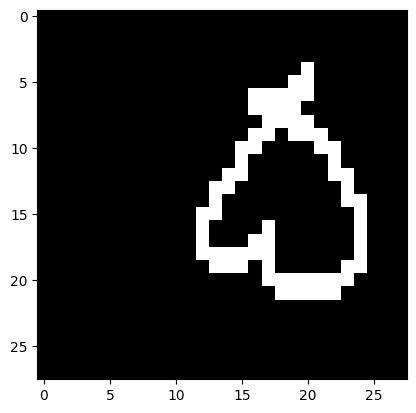

In [ ]:
plt.imshow(image,cmap = 'gray')

In [ ]:
class_name = np.array(class_name)
class_name.shape

In [ ]:
DFY = pd.DataFrame(class_name)

In [ ]:
DFY.rename(columns = {0:'TARGET'}, inplace = True)

In [ ]:
img_data[img_data>100]=255
img_data[img_data<=100]=0

In [ ]:
DF = pd.DataFrame(img_data)

In [ ]:
emoji_dataset= pd.concat([DFY, DF], axis=1)

In [ ]:
for i in emoji_dataset.columns:
    try:
        emoji_dataset[[i]] = emoji_dataset[[i]].astype(float).astype(int)
    except:
        pass

In [ ]:
for i in range(9204):
    if (emoji_dataset['TARGET'][i]=='checkmark') :
        emoji_dataset['TARGET'][i]=3
    if (emoji_dataset['TARGET'][i]=='cloud') :
        emoji_dataset['TARGET'][i]=7
    if (emoji_dataset['TARGET'][i]=='croissant') :
        emoji_dataset['TARGET'][i]=9
    if (emoji_dataset['TARGET'][i]=='heart') :
        emoji_dataset['TARGET'][i]=15
    if (emoji_dataset['TARGET'][i]=='laugh') :
        emoji_dataset['TARGET'][i]=17
    if (emoji_dataset['TARGET'][i]=='smile') :
        emoji_dataset['TARGET'][i]=21
    if (emoji_dataset['TARGET'][i]=='sun') :
        emoji_dataset['TARGET'][i]=22

MERGING ALPHABET AND EMOJI DATASET

In [ ]:
#dataset = pd.concat([dataframe,emoji_dataset], axis=0)

SHUFFLING DATASET

In [ ]:
from sklearn.utils import shuffle

In [ ]:
dataframe= shuffle(dataframe)
emoji_dataset= shuffle(emoji_dataset)

In [ ]:
dataframe.to_csv('letter_dataset.csv')

In [ ]:
emoji_dataset.to_csv('emoji_dataset.csv')